## Description:

1. Dataset (Recommended): [Titanic: Machine Learning from Disaster Kaggle](https://www.kaggle.com/datasets/shuofxz/titanic-machine-learning-from-disaster).
2. Explore the classic Titanic dataset using Python.
3. Perform data cleaning: handle missing values, convert types.
4. Generate summary statistics and group-based insights (e.g., survival by gender/class).
5. Visualize key patterns and correlations.

## Tools & Libraries:
- Python | Pandas | Seaborn or Matplotlib
## Covered Topics:
- EDA | Data types & missing data |  Data visualization
## Bonus:
- Visualize survival rates using bar plots and heatmaps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="pastel")

In [3]:
# Loading the Data
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

In [ ]:
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing Embarked with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop Cabin due to many missing values
data.drop(columns=['Cabin'], inplace=True)

In [ ]:
# Verifying cleaning
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
# Summary Statistics
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [9]:
# Survival rate by gender
data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [10]:
# Survival rate by class
data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [11]:
# Survival rate by embarkation port
data.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

## Data Visualization

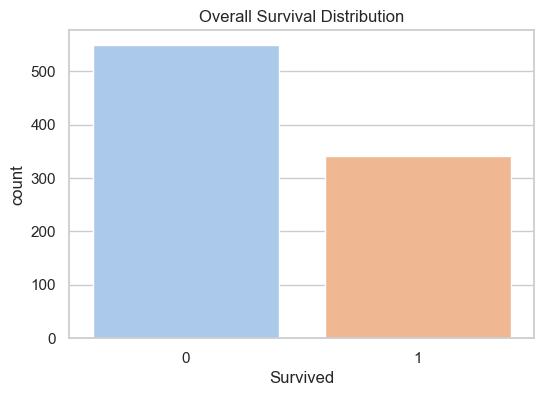

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=data)
plt.title('Overall Survival Distribution')
plt.show()

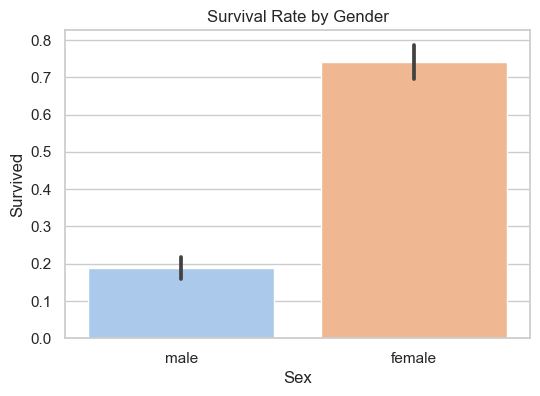

In [13]:
# Survival by Gender
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=data, estimator=np.mean)
plt.title('Survival Rate by Gender')
plt.show()

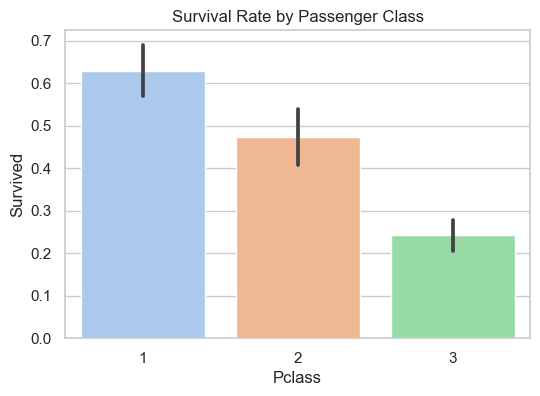

In [14]:
# Survival by Class
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=data, estimator=np.mean)
plt.title('Survival Rate by Passenger Class')
plt.show()

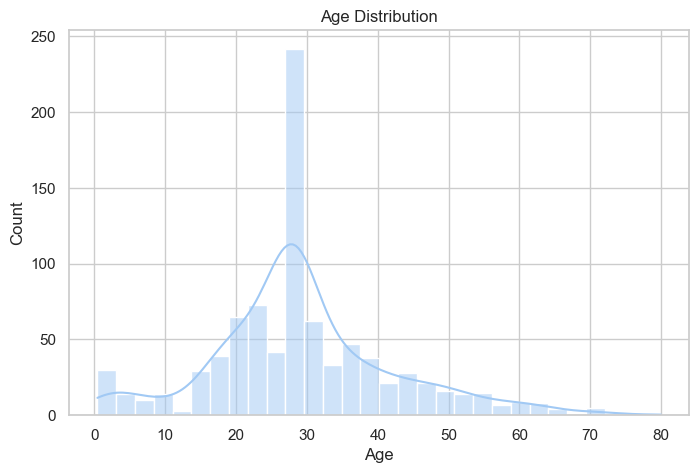

In [15]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

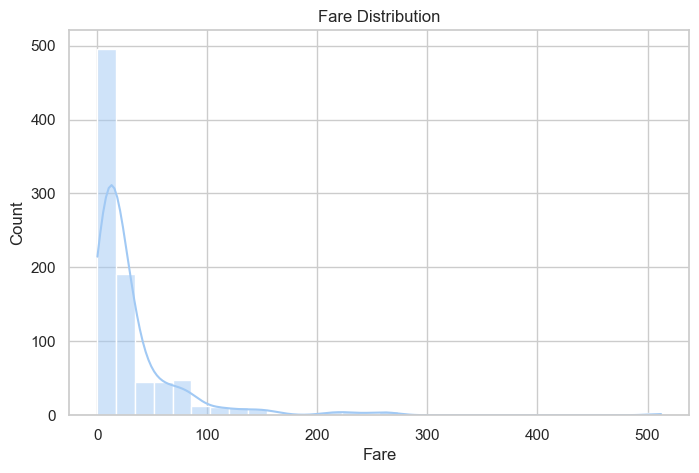

In [16]:
# Fare Distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

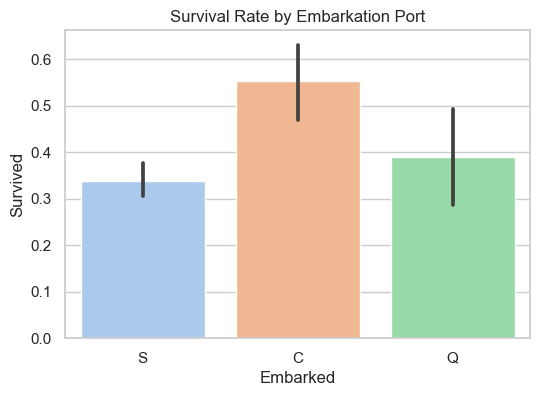

In [17]:
# Survival by Embarked
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=data, estimator=np.mean)
plt.title('Survival Rate by Embarkation Port')
plt.show()

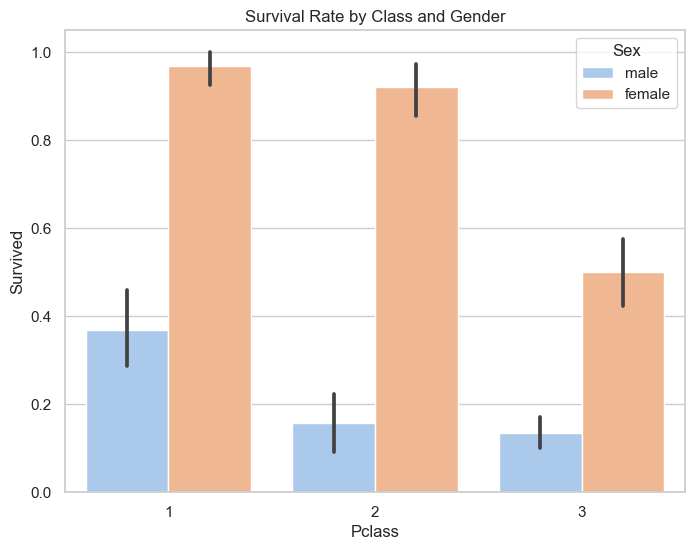

In [18]:
# Survival by Class and Gender
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data, estimator=np.mean)
plt.title('Survival Rate by Class and Gender')
plt.show()

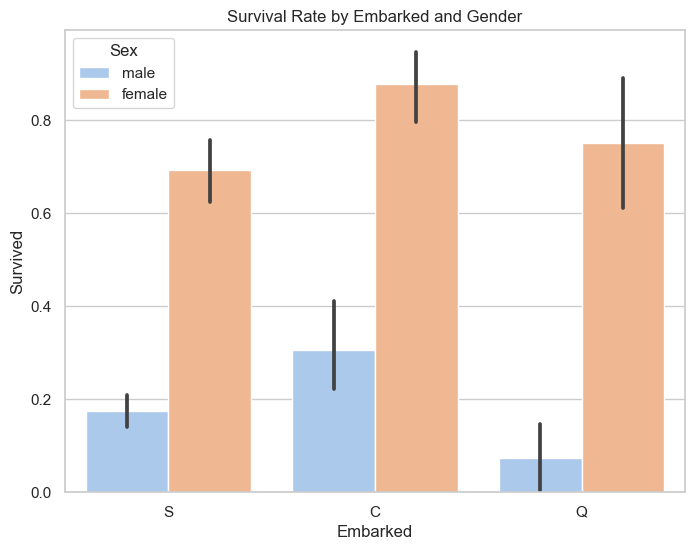

In [19]:
# Survival by Embarked and Gender
plt.figure(figsize=(8,6))
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=data, estimator=np.mean)
plt.title('Survival Rate by Embarked and Gender')
plt.show()